### Convolutional Neural Networks: Step by Step
    Welcome to Course 4's first assignment! In this assignment, you will implement convolutional (CONV) and pooling (POOL) layers in numpy, including both forward propagation and (optionally) backward propagation.

    By the end of this notebook, you'll be able to:

    - Explain the convolution operation
    - Apply two different types of pooling operation
    - Identify the components used in a convolutional neural network (padding, stride, filter, ...) and their purpose
    - Build a convolutional neural network

### Notation:

- Superscript [l] denotes an object of the lth layer.

Example: $a^{[4]}$ is the $4^{th}$ layer activation. $W^{[5]}$ and $b^{[5]}$ are the $5^{th}$ layer parameters.

- Superscript (i) denotes an object from the $i^{th}$ example.

Example: $x^{(i)}$ is the $i^{th}$ training example input.

- Subscript i denotes the ith entry of a vector.

Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the activations in layer l, assuming this is a fully connected (FC) layer.

- $n_H, n_W \;and\; n_C$ denote respectively the height, width and number of channels of a given layer. If you want to reference a specific layer l, you can also write $n_H^{[l]}, n_W^{[l]}\; and \;n_C^{[l]}$
- $n_{H_{prev}}, n_{W_{prev}}\; and\; n_{C_{prev}}$ denote respectively the height, width and number of channels of the previous layer. If referencing a specific layer l, this could also be denoted $n_H^{[l-1]}, n_W^{[l-1]} \;and\; n_C^{[l-1]}$

    You should be familiar with numpy and/or have completed the previous courses of the specialization. Let's get started!

**Table of Contents**
- 1 - Packages
- 2 - Outline of the Assignment
- 3 - Convolutional Neural Networks
    - 3.1 - Zero-Padding
        - Exercise 1 - zero_pad
    - 3.2 - Single Step of Convolution
        - Exercise 2 - conv_single_step
    - 3.3 - Convolutional Neural Networks - Forward Pass
        - Exercise 3 - conv_forward
- 4 - Pooling Layer
    - 4.1 - Forward Pooling
        - Exercise 4 - pool_forward
- 5 - Backpropagation in Convolutional Neural Networks (OPTIONAL / UNGRADED)
    - 5.1 - Convolutional Layer Backward Pass
       -  5.1.1 - Computing dA
       -  5.1.2 - Computing dW
       -  5.1.3 - Computing db
       - Exercise 5 - conv_backward
     - 5.2 Pooling Layer - Backward Pass
       - 5.2.1 Max Pooling - Backward Pass
            - Exercise 6 - create_mask_from_window
       - 5.2.2 - Average Pooling - Backward Pass
            - Exercise 7 - distribute_value
       - 5.2.3 Putting it Together: Pooling Backward
            - Exercise 8 - pool_backward

### 1. Import Packages

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

%matplotlib inline
plt.rcParams["figure.figsize"] = (5.0, 4.0)
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gray"

np.random.seed(1)

### 2 - Outline of the Assignment
    You will be implementing the building blocks of a convolutional neural network! Each function you will implement will have detailed instructions to walk you through the steps:

**Convolution functions, including:**
- Zero Padding
- Convolve window (filter)
- Convolution forward
- Convolution backward (optional)

**Pooling functions, including:**
- Pooling forward
- Create mask
- Distribute value
- Pooling backward (optional)

        This notebook will ask you to implement these functions from scratch in numpy. 
        
        In the next notebook, you will use the TensorFlow equivalents of these functions to build the following model:
        
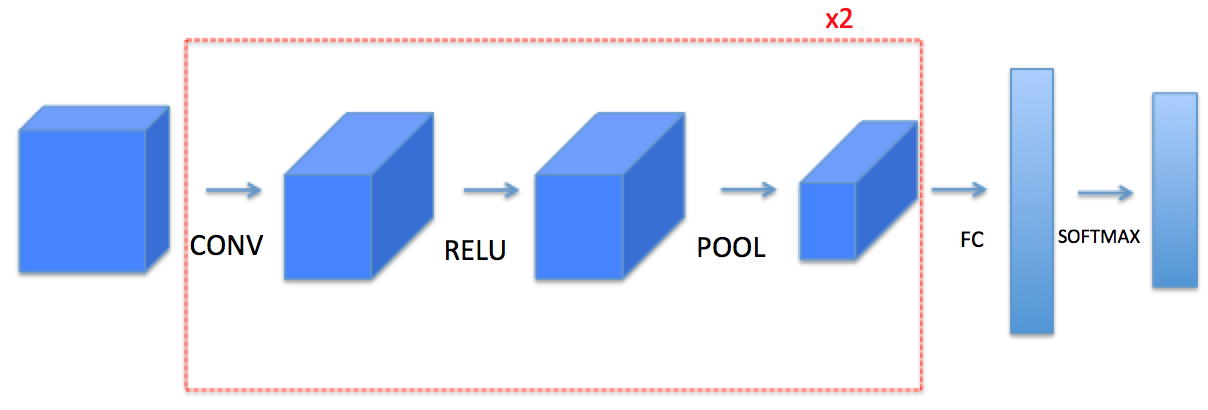

    Note: For every forward function, there is a corresponding backward equivalent. Hence, at every step of your forward module you will store some parameters in a cache. These parameters are used to compute gradients during backpropagation.

### 3 - Convolutional Neural Networks
    Although programming frameworks make convolutions easy to use, they remain one of the hardest concepts to understand in Deep Learning. 
    
    A convolution layer transforms an input volume into an output volume of different size, as shown below.
 
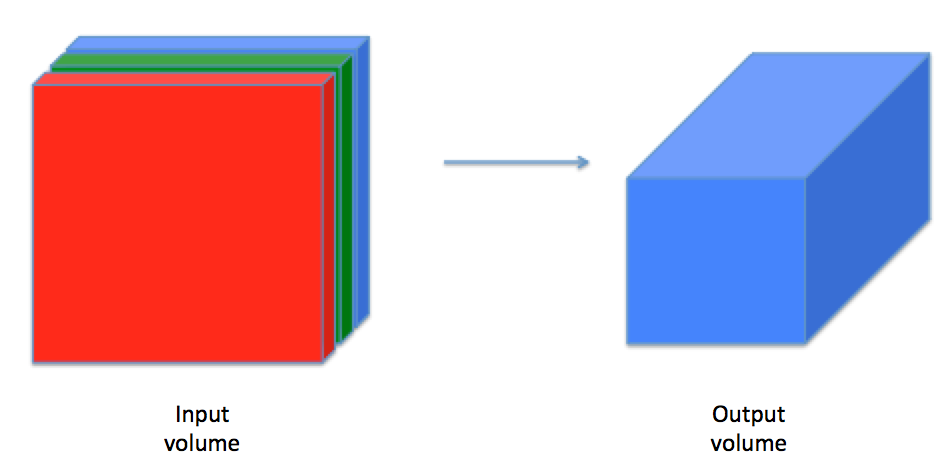
    
    In this part, you will build every step of the convolution layer. 
    
    You will first implement two helper functions: one for zero padding and the other for computing the convolution function itself.

### 3.1 - Zero-Padding
    Zero-padding adds zeros around the border of an image:
    
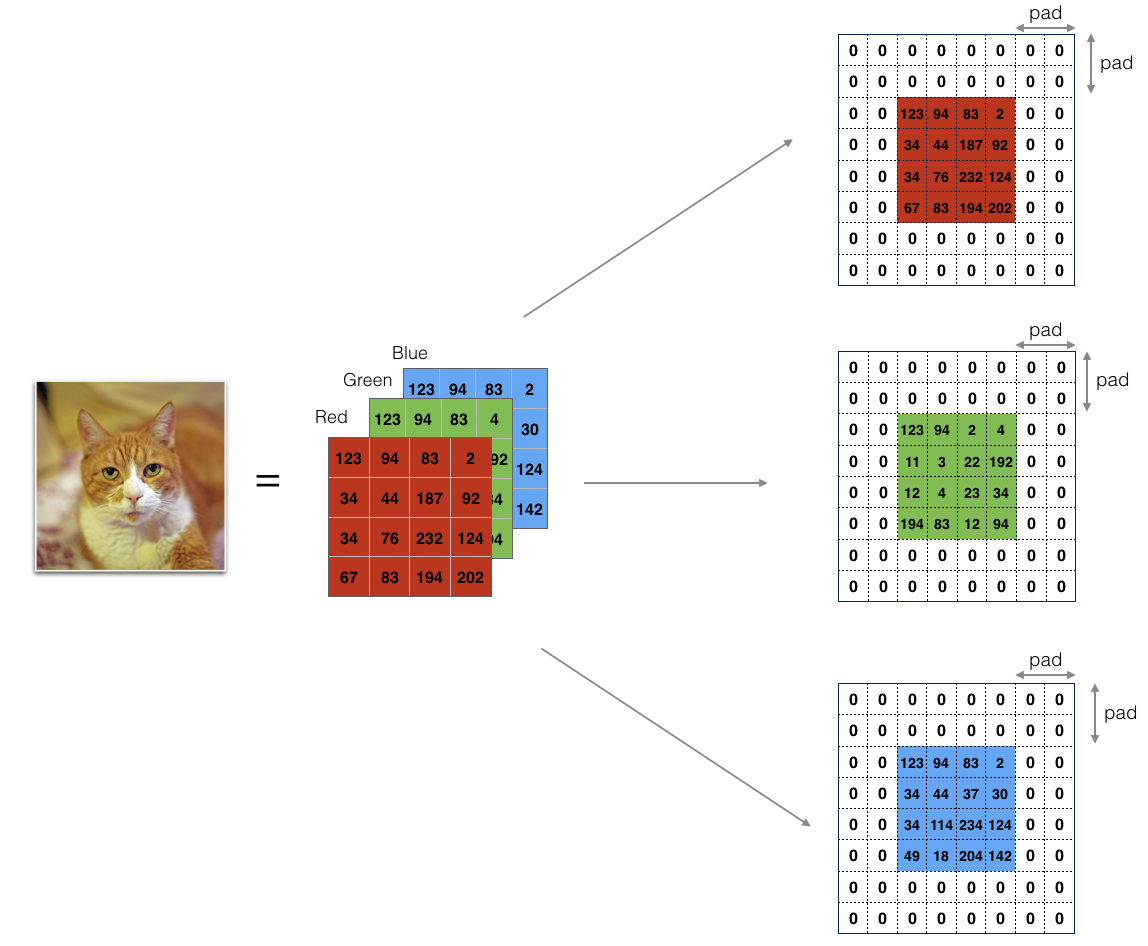
    Figure 1 : Zero-Padding
    Image (3 channels, RGB) with a padding of 2.
    
    The main benefits of padding are:

    It allows you to use a CONV layer without necessarily shrinking the height and width of the volumes. This is important for building deeper networks, since otherwise the height/width would shrink as you go to deeper layers. An important special case is the "same" convolution, in which the height/width is exactly preserved after one layer.

    It helps us keep more of the information at the border of an image. Without padding, very few values at the next layer would be affected by pixels at the edges of an image.


**Exercise 1 - zero_pad**
     
     Implement the following function, which pads all the images of a batch of examples X with zeros. Use np.pad. Note if you want to pad the array "a" of shape (5, 5, 5, 5, 5) with pad = 1 for the 2nd dimension, pad = 3 for the 4th dimension and pad = 0 for the rest, you would do:

    a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), mode='constant', constant_values = (0,0))

In [4]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2 * pad, n_W + 2 * pad, n_C)
    """
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), mode="constant", constant_values=(0, 0)) # dimensions m, nh, nw, nc
    return X_pad

Original image
(4, 3, 3, 2)
[[[ 0.04221375  0.58281521]
  [-1.10061918  1.14472371]
  [ 0.90159072  0.50249434]]

 [[ 0.90085595 -0.68372786]
  [-0.12289023 -0.93576943]
  [-0.26788808  0.53035547]]

 [[-0.69166075 -0.39675353]
  [-0.6871727  -0.84520564]
  [-0.67124613 -0.0126646 ]]]

[[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]

 padded Image
(4, 9, 9, 2)
[[[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]]

 [[ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.          0.        ]
  [ 0.     

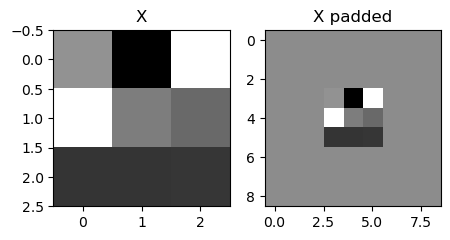

In [21]:
#Test the function
np.random.seed(1)
X = np.random.randn(4, 3, 3, 2) #m, nh, nw, nC
print("Original image")
print(X.shape)
print(X[1]) #accessing second example m index=1
print("\n"+str(X[1, 1])) #accessing second row of 2nd image with 2channels, each [val1 val2] is the pixel value for 2 channels in a row

print("\n padded Image")
X_pad = zero_pad(X, pad=3)
print(X_pad.shape)
print(X_pad[1]) #accessing second example m index=1
print("\n"+str(X_pad[1, 1])) #accessing second image, second row(corresponding to nh), with 2 channels for each row pixel


fig, axes = plt.subplots(1, 2)
axes[0].set_title("X")
axes[0].imshow(X[1, :, :, 0]) #second example idx 1 and first channel - index 0
axes[1].set_title("X padded")
axes[1]. imshow(X_pad[1, :, :, 0])
plt.show()

### Some notes on 3d image indexing
    In the code snippet you provided, X[1, 1] is accessing a specific slice of the NumPy array X, which represents an image. Here's a breakdown of what X[1, 1] means in the context of your code:

    X is a NumPy array with shape (4, 3, 3, 2), where:

    4 represents the number of examples or samples (m).
    3 represents the height of each image (nh).(horizontal rows)
    3 represents the width of each image (nw).(vertical columns)
    2 represents the number of channels or color channels/depth (nC). e.g., red and green channels in an image.
    
    X[1, 1] accesses a specific slice of the array X. Here's what each part means:

    The first 1 in X[1, 1] corresponds to the example (m) or sample index. In this case, it accesses the second example, as Python uses 0-based indexing. So, X[1] is the second image in the batch of images.

    The second 1 in X[1, 1] corresponds to the height index (nh). It selects a specific row or vertical slice within the image. Again, using 0-based indexing, X[1, 1] is the second row of pixels within the second image. Note that since we hahve 2 channels, each pixel in a row will have 2 numbers as there are 2 channels

    Therefore, X[1, 1] represents the second row of pixels in the second image within the batch of images. This is a 3x2 array (3 rows and 2 columns) of pixel values. Where as if you access X[1], it means you are accessing second example of shape (3, 3, 2) => 3 rows, 3 columns, 2 channels. 
    
    So basically in 3D array, the values inside first [] represents rows(placing one below the other, vertical slicing), the inner values of second brace indicates columns(horizontal slicing,plaing one after the other, next to each other), and the third brace indicates channels.
    
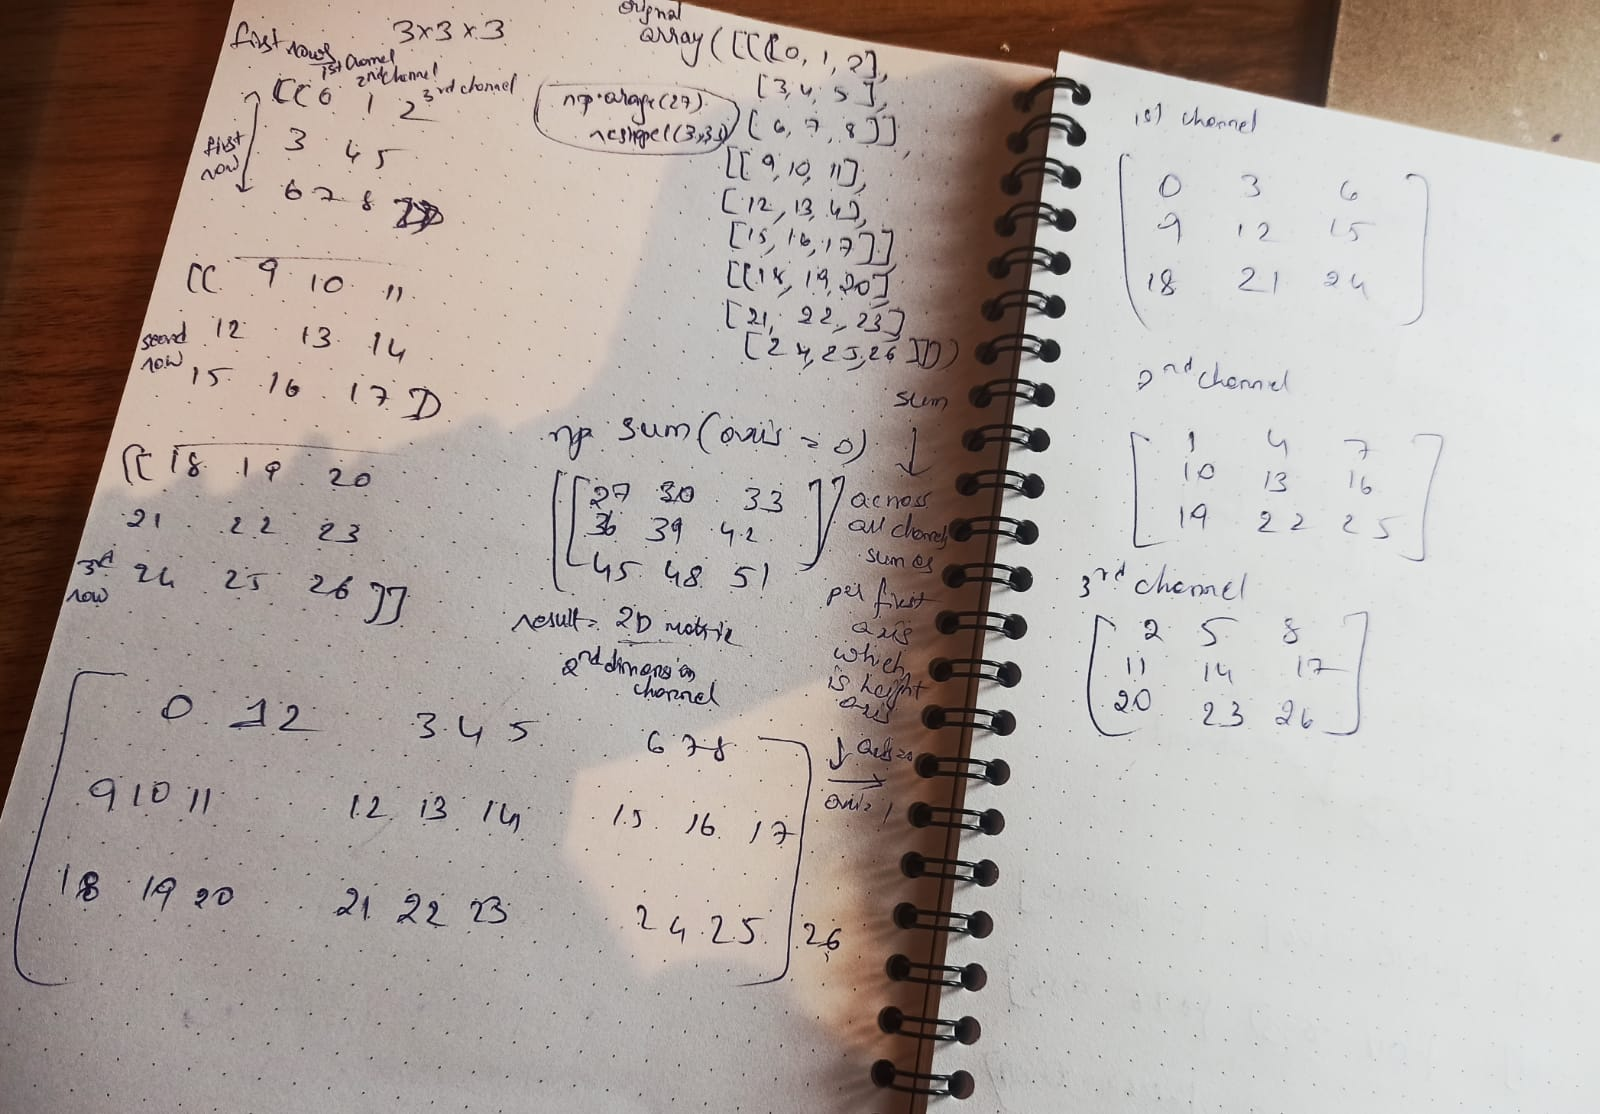

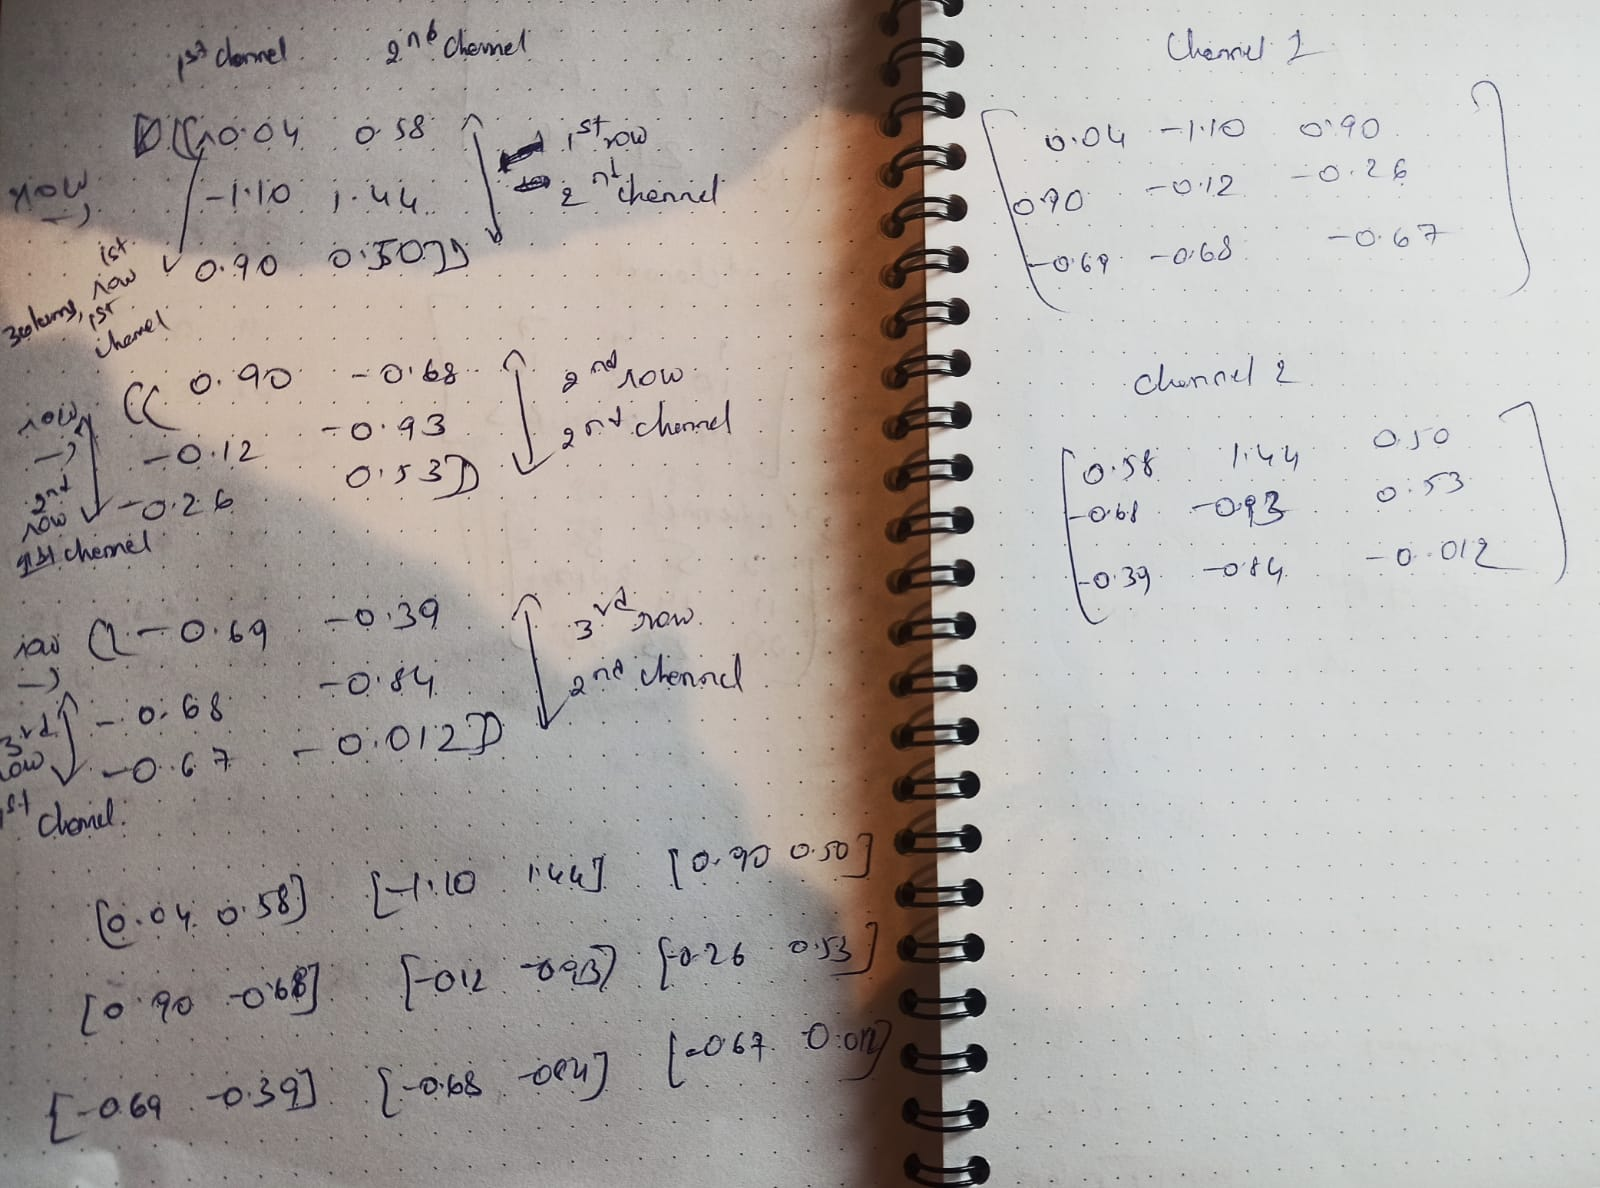

In [23]:
x = np.arange(27).reshape((3,3,3))
print(x)

print(x.sum(axis=0))

# for sum, axis is the first keyword, so we may omit it,
# specifying only its value
print("\n"+str(x.sum(0)))
print(x.sum(1))
print(x.sum(2))

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
[[27 30 33]
 [36 39 42]
 [45 48 51]]

[[27 30 33]
 [36 39 42]
 [45 48 51]]
[[ 9 12 15]
 [36 39 42]
 [63 66 69]]
[[ 3 12 21]
 [30 39 48]
 [57 66 75]]


### 3.2 - Single Step of Convolution
    In this part, implement a single step of convolution, in which you apply the filter to a single position of the input. This will be used to build a convolutional unit, which:

    - Takes an input volume
    - Applies a filter at every position of the input
    - Outputs another volume (usually of different size)

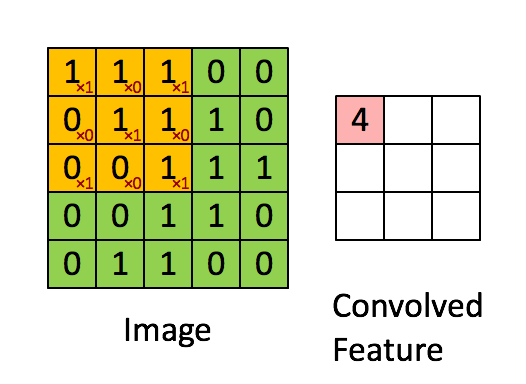
Figure 2 : Convolution operation
with a filter of 3x3 and a stride of 1 (stride = amount you move the window each time you slide)

    In a computer vision application, each value in the matrix on the left corresponds to a single pixel value. You convolve a 3x3 filter with the image by multiplying its values element-wise with the original matrix, then summing them up and adding a bias. In this first step of the exercise, you will implement a single step of convolution, corresponding to applying a filter to just one of the positions to get a single real-valued output.

    Later in this notebook, you'll apply this function to multiple positions of the input to implement the full convolutional operation.

#### Exercise 2 - conv_single_step
    Implement conv_single_step().

    Hint.

    Note: The variable b will be passed in as a numpy array. If you add a scalar (a float or integer) to a numpy array, the result is a numpy array. In the special case of a numpy array containing a single value, you can cast it as a float to convert it to a scalar.

In [4]:
def conv_single_step(X_prev_slice, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    X_prev_slice -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window- filter - matrix of shape (f, f, n_C_prev) 
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, the result of convolving the sliding window (W, b) on a slice x of the input data
    """
    # Element-wise product between X_prev_slice and W. Do not add the bias yet.
#     print("conv single step")
#     print(X_prev_slice.shape) #n_h, n_w, all channels
#     print(W.shape) #n_h, n_w, all channels
    s = np.multiply(X_prev_slice, W) 
#     print(s.shape) #n_h, n_w, all channels
    
    # Sum over all entries of the volume s.
    conv_output = np.sum(s)  #scalar
    
    # Add bias b to conv_output. Cast b to a float() so that Z results in a scalar value.
    b = np.squeeze(b)
    Z = conv_output + b #see we are adding b to every Z with W (broadcasting b basically to all Z's)
    
    return Z

In [26]:
#test the function
np.random.seed(1)
X_prev_slice = np.random.randn(4, 4, 3)
filter_ = np.random.randn(4, 4, 3) 
b = np.random.randn(1, 1, 1)

Z = conv_single_step(X_prev_slice, filter_, b)
print("Z=", Z)

assert type(Z) == np.float64, "You must cast the output to numpy float 64"
assert np.isclose(Z, -6.999089450680221), "Wrong value for Z"

Z= -6.999089450680221


### 3.3 - Convolutional Neural Networks - Forward Pass
    In the forward pass, you will take many filters and convolve them on the input. Each 'convolution' gives you a 2D matrix output. You will then stack these outputs to get a 3D volume:

#### Exercise 3 - conv_forward
    Implement the function below to convolve the filters W on an input activation A_prev.
    
    This function takes the following inputs:

    - A_prev, the activations output by the previous layer (for a batch of m inputs);
    - Weights are denoted by W. The filter window size is f by f.
    - The bias vector is b, where each filter has its own (single) bias.
    - You also have access to the hyperparameters dictionary, which contains the stride and the padding.

    Hint:

        To select a 2x2 slice at the upper left corner of a matrix "a_prev" (shape (5,5,3)), you would do:
                        a_slice_prev = a_prev[0:2,0:2,:]
        Notice how this gives a 3D slice that has height 2, width 2, and depth 3. Depth is the number of channels.
        This will be useful when you will define a_slice_prev below, using the start/end indexes you will define.

    To define a_slice you will need to first define its corners vert_start, vert_end, horiz_start and horiz_end. This figure may be helpful for you to find out how each of the corners can be defined using h, w, f and s in the code below.

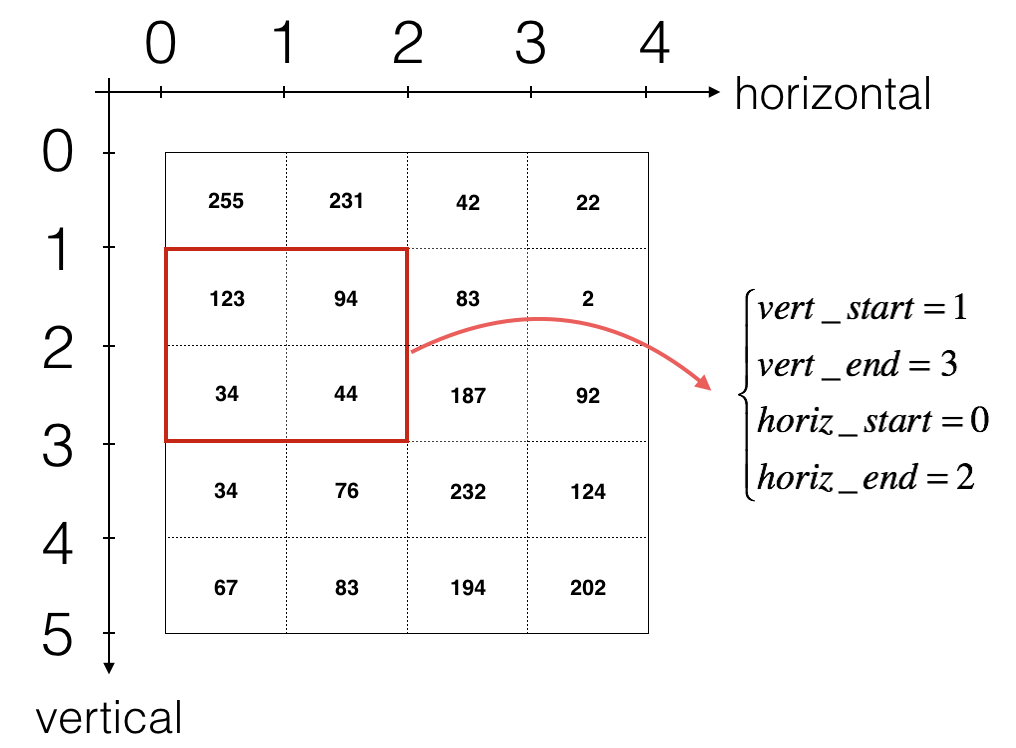
Figure 3 : Definition of a slice using vertical and horizontal start/end (with a 2x2 filter)
This figure shows only a single channel.

    Reminder:

    The formulas relating the output shape of the convolution to the input shape are:
                
                
$ n_H =  (\lfloor \frac{(n_{H_{prev}} + 2p - f)}{s}\rfloor + 1$

$ n_W =  (\lfloor \frac{(n_{W_{prev}} + 2p - f)}{s}\rfloor + 1$

$n_C$ = number of filters used in convolution

    For this exercise, don't worry about vectorization! Just implement everything with for-loops.

    Additional Hints (if you're stuck):
    Use array slicing (e.g.varname[0:1,:,3:5]) for the following variables:
        a_prev_pad ,W, b
    Copy the starter code of the function and run it outside of the defined function, in separate cells.
    Check that the subset of each array is the size and dimension that you're expecting.
    To decide how to get the vert_start, vert_end, horiz_start, horiz_end, remember that these are indices of the previous layer.
    Draw an example of a previous padded layer (8 x 8, for instance), and the current (output layer) (2 x 2, for instance).
    The output layer's indices are denoted by h and w.
    Make sure that a_slice_prev has a height, width and depth.
    Remember that a_prev_pad is a subset of A_prev_pad.
    Think about which one should be used within the for loops.

In [5]:
def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, 
        numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    stride, pad = hparameters["stride"], hparameters["pad"]
    
    #Get the filter shape
    f, f, n_C_prev, n_C = W.shape #filter shape, n_C = no of filters at this current layer
    
    #get the m, n_H_prev, n_W_prev and n_C_prev
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    
    #get the output volume size
    n_H = int((n_H_prev + 2*pad - f) / stride) + 1 #note we are taking n_H n_W before padding as we are applying pad in formula
    n_W = int((n_W_prev + 2*pad - f) / stride) + 1
    
    Z = np.zeros((m, n_H, n_W, n_C)) #n_C of no of channels for the o/p actvtion of current layer = no. of current layer filters
    #also note m starts first, later in fc layers it usual where m will b in columns and labe;s as well (1, m)
    
    #initialize horizontal and veertical start and end indexes
  
    
    #apply padding to the previous layer activation
    A_prev_padded = zero_pad(A_prev, pad)
    #note we are calculating output Z's shape before padding the input

    #convolution operation
    for i in range(m):
        a_prev_pad = A_prev_padded[i] #accessing each 3channeled i/p image
        
        for h in range(n_H):
            #start and end position of vertical index which represents rows
            vstart = stride * h
            vend = vstart + f
            
            for w in range(n_W):
                #start and end position of horizontal indx which reoresent cols
                hstart = stride * w #(row represents n_H, but each row completion is going across n_W dimension)
                hend = hstart + f
                
                for c in range(n_C):
                    #accessing each filter from n_C filters, we are looping each filter and calculating the output value of all the filters for one o/p position
                    
                    weights = W[:, :, :, c] #each one filter among n_C filters (each filter has all channels)
                    biases = b[:, :, :, c]
                    a_prev_pad_slice = a_prev_pad[vstart:vend, hstart:hend, :] #a's slice of all channels
                    Z[i, h, w, c] = conv_single_step(a_prev_pad_slice, weights, biases) #each example's feature detection values(matrix) of each feature detector. each feature detector is a feature in that layer.
    
    cache = (A_prev, W, b, hparameters)  #input, parameters. hyperparameters in cache always         
    
    return Z, cache

In [46]:
# test the function conv_forward()
np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4) #m, nH_prev, nW_prev, nC_prev
W = np.random.randn(3, 3, 4, 8) #f, f, nCprev, nC
b = np.random.randn(1, 1, 1, 8) #1, 1, 1, nC
hparams = {"stride" : 2, "pad" : 1}

Z, cache_conv = conv_forward(A_prev, W, b, hparams) # m, nH, nW, nC

print(Z.shape) #stride 2 reduces the spatial dimensions almost by a factor of 2

Z_mean = np.mean(Z)

Z_0_2_1 = Z[0, 2, 1] #0th example 2nd row 1 column, all channels ( we get 8 values as all channels for Z = 8)

cache_0_1_2_3 = cache_conv[0][1][2][3] #cache 0th entry = Aprev, [1] - first example Aprev, [2] - 3rd row, [3] - 4th column and Aprev contains 4 channels, so we get 4 numbers


print("Z's mean =\n", Z_mean)
print("Z[0,2,1] =\n", Z_0_2_1)
print("cache_conv[0][1][2][3] =\n", cache_0_1_2_3)


print(A_prev[1, 2, 3])
print(cache_conv[0].shape)

(2, 3, 4, 8)
Z's mean =
 0.5511276474566768
Z[0,2,1] =
 [-2.17796037  8.07171329 -0.5772704   3.36286738  4.48113645 -2.89198428
 10.99288867  3.03171932]
cache_conv[0][1][2][3] =
 [-1.1191154   1.9560789  -0.3264995  -1.34267579]
[-1.1191154   1.9560789  -0.3264995  -1.34267579]
(2, 5, 7, 4)


    Finally, a CONV layer should also contain an activation, in which case you would add the following line of code:

    # Convolve the window to get back one output neuron
    Z[i, h, w, c] = ...
    # Apply activation
    A[i, h, w, c] = activation(Z[i, h, w, c])
    You don't need to do it here, however.


### 4 - Pooling Layer
    The pooling (POOL) layer reduces the height and width of the input. It helps reduce computation, as well as helps make feature detectors more invariant to its position in the input. The two types of pooling layers are:

    - Max-pooling layer: slides an (f, f) window over the input and stores the max value of the window in the output.

    - Average-pooling layer: slides an (f, f) window over the input and stores the average value of the window in the output.
    
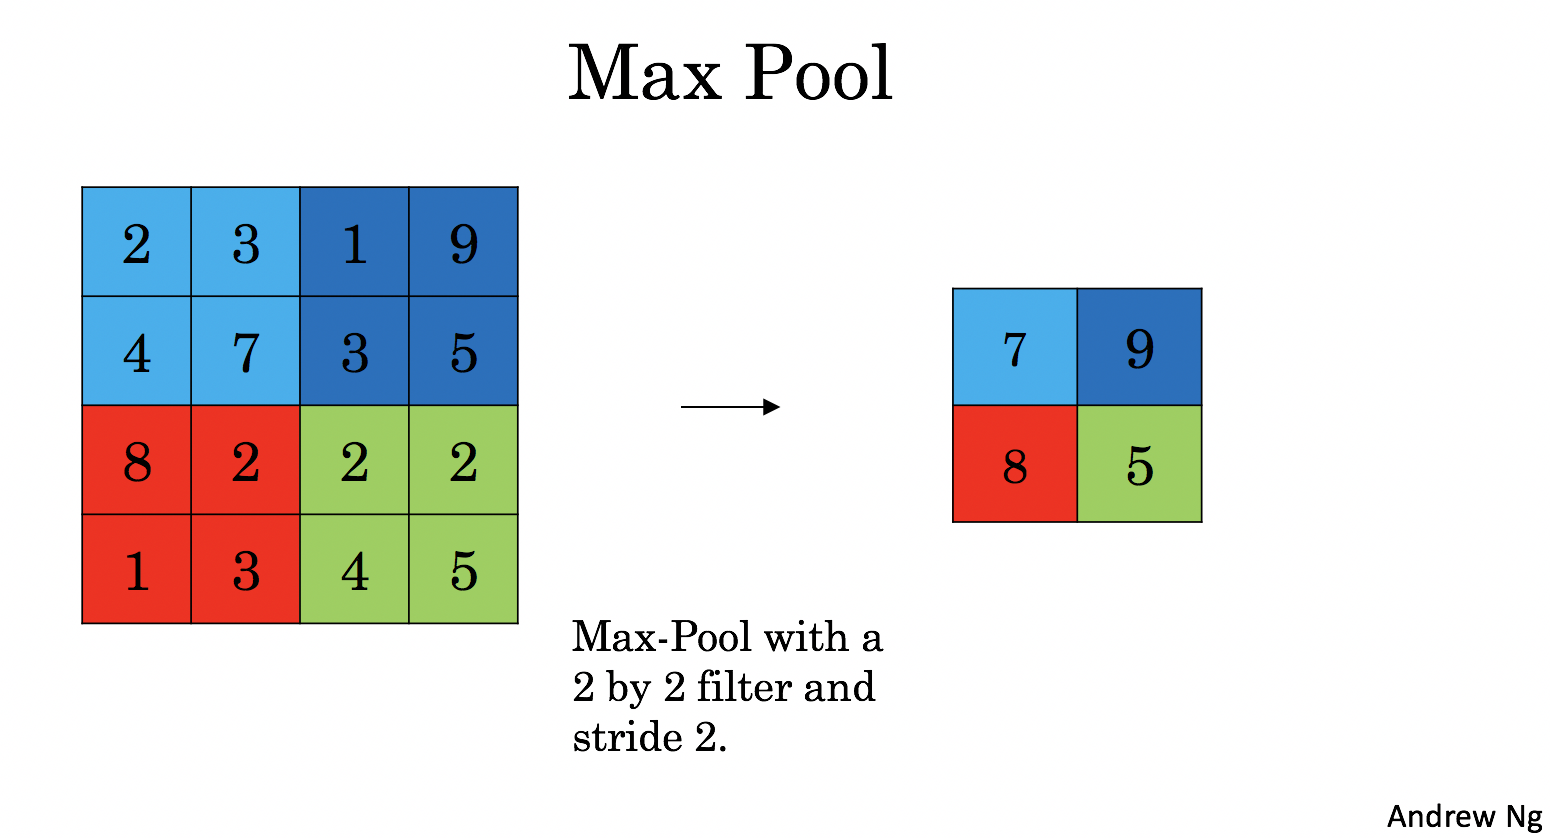

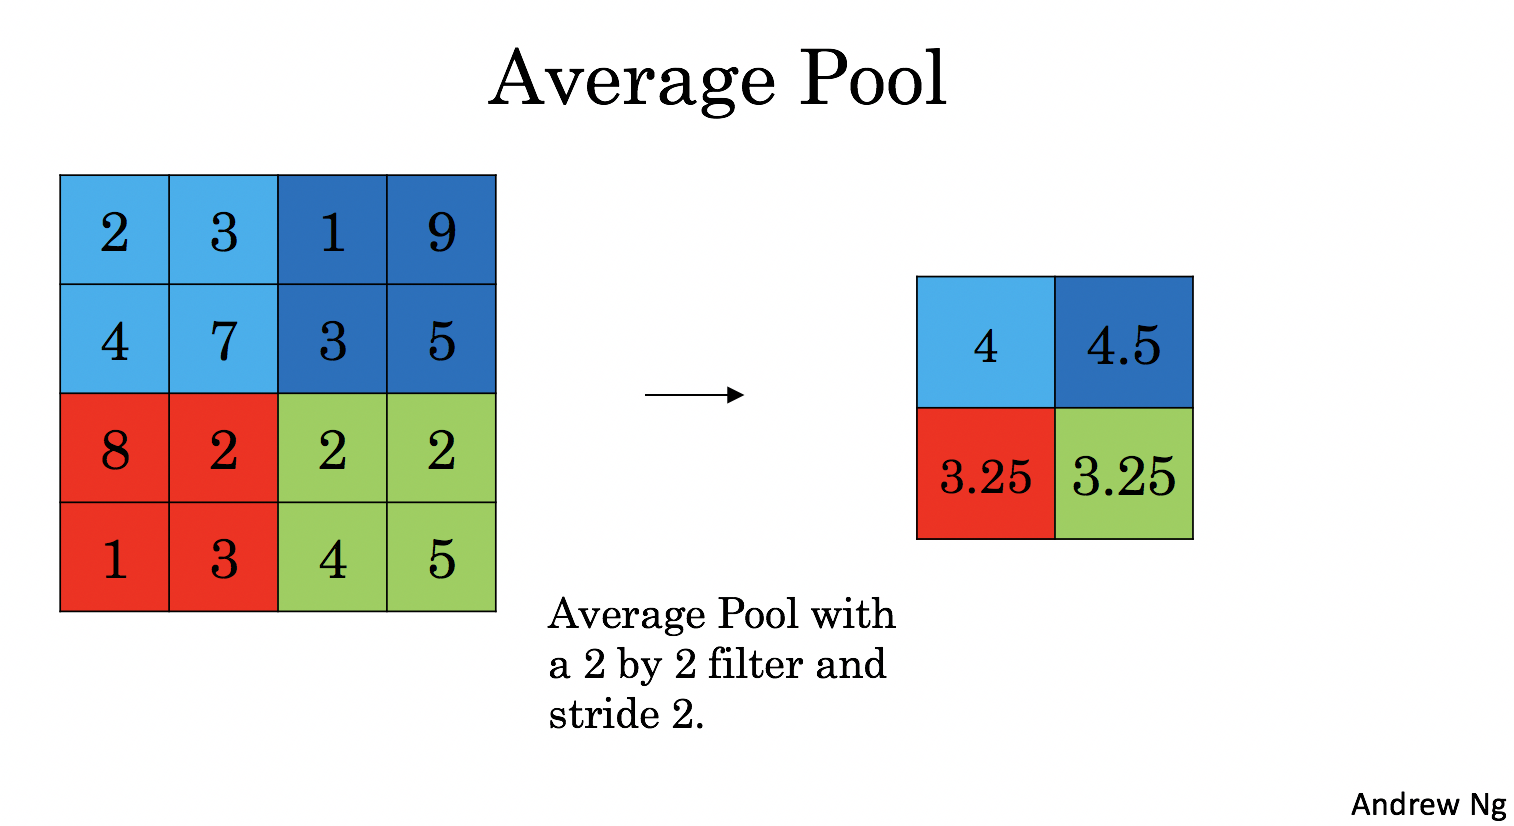

    These pooling layers have no parameters for backpropagation to train. However, they have hyperparameters such as the window size f. This specifies the height and width of the fxf window you would compute a max or average over.


### 4.1 - Forward Pooling
    Now, you are going to implement MAX-POOL and AVG-POOL, in the same function.


#### Exercise 4 - pool_forward
    Implement the forward pass of the pooling layer. Follow the hints in the comments below.

    Reminder: As there's no padding, the formulas binding the output shape of the pooling to the input shape is:           
                
$ n_H =  (\lfloor \frac{(n_{H_{prev}} - f)}{s}\rfloor + 1$

$ n_W =  (\lfloor \frac{(n_{W_{prev}} - f)}{s}\rfloor + 1$

$n_C = n_{C_{prev}}$ (no of channels of its previous conv layer)

In [53]:
def pool_forward(A_prev, hparameters, mode="max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data(convultion output), numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    s = hparameters["stride"]
    
    # Retrieve dimensions from the input shape
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    
    # Define the dimensions of the output
    n_H = int((n_H_prev - f) / s) + 1
    n_W = int((n_W_prev - f) / s) + 1
    n_C = n_C_prev 
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))
    
    
    #Max Pooling operation
    
    # loop over the training examples
    for i in range(m):
        
        a_prev = A_prev[i] 
        
        # loop on the vertical axis of the output volume
        for h in range(n_H):
            # Find the vertical start and end of the current "slice" 
            vstart = s * h
            vend = vstart + f

            # loop on the horizontal axis of the output volume
            for w in range(n_W):
                # Find the vertical start and end of the current "slice" 
                hstart = s * w
                hend = hstart + f
                
                
                # loop over the channels of the output volume
                for c in range(n_C):
                    # Use the start end corners to define the current slice on the ith training example of A_prev, channel c
                    a_prev_slice = a_prev[vstart:vend, hstart:hend, c] # we perform maxpooling per channel
                    
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
                    else:
                        print(mode+ "-type pooling layer NOT Defined")  
     
    cache = (A_prev, hparameters) #A_prev here is relu(Z) - output of conv of that layer(combined conv+pool)              

    return A, cache

In [54]:
#test the function

# Case 1: stride of 1
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparam = {"f": 3,
         "stride": 1}

A, cache_pool = pool_forward(A_prev, hparam, mode="max")
print("mode = max")
print("A.shape = " + str(A.shape)) #spatial dimensions reduces
print("A[1, 1] =\n", A[1, 1]) #second example, second row, all columns, all channels = (3 ,3)


A, cache_pool = pool_forward(A_prev, hparam, mode="average")
print("mode = average")
print("A.shape = " + str(A.shape)) #spatil dimensions reduces
print("A[1, 1] =\n", A[1, 1])

mode = max
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[1.96710175 0.84616065 1.27375593]
 [1.96710175 0.84616065 1.23616403]
 [1.62765075 1.12141771 1.2245077 ]]
mode = average
A.shape = (2, 3, 3, 3)
A[1, 1] =
 [[ 0.44497696 -0.00261695 -0.31040307]
 [ 0.50811474 -0.23493734 -0.23961183]
 [ 0.11872677  0.17255229 -0.22112197]]


In [56]:
# Case 2: stride of 2
np.random.seed(1)
A_prev = np.random.randn(2, 5, 5, 3)
hparameters = {"stride" : 2, "f": 3}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A.shape = " + str(A.shape))
print("A[0] =\n", A[0])
print()

A, cache = pool_forward(A_prev, hparameters, mode="average")
print("mode = average")
print("A.shape = " + str(A.shape))
print("A[1] =\n", A[1])

mode = max
A.shape = (2, 2, 2, 3)
A[0] =
 [[[1.74481176 0.90159072 1.65980218]
  [1.74481176 1.6924546  1.65980218]]

 [[1.13162939 1.51981682 2.18557541]
  [1.13162939 1.6924546  2.18557541]]]

mode = average
A.shape = (2, 2, 2, 3)
A[1] =
 [[[-0.17313416  0.32377198 -0.34317572]
  [ 0.02030094  0.14141479 -0.01231585]]

 [[ 0.42944926  0.08446996 -0.27290905]
  [ 0.15077452  0.28911175  0.00123239]]]


**What you should remember:**

- A convolution extracts features from an input image by taking the dot product between the input data and a 3D array of weights (the filter).
- The 2D output of the convolution is called the feature map
- A convolution layer is where the filter slides over the image and computes the dot product
- This transforms the input volume into an output volume of different size
- Zero padding helps keep more information at the image borders, and is helpful for building deeper networks, because you can build a CONV layer without shrinking the height and width of the volumes
- Pooling layers gradually reduce the height and width of the input by sliding a 2D window over each specified region, then summarizing the features in that region
    
 
      Congratulations! You have now implemented the forward passes of all the layers of a convolutional network. Great work!

      The remainder of this notebook is optional, and will not be graded. If you carry on, just remember to hit the Submit button to submit your work for grading first.

### 5 - Backpropagation in Convolutional Neural Networks (OPTIONAL / UNGRADED)
    In modern deep learning frameworks, you only have to implement the forward pass, and the framework takes care of the backward pass, so most deep learning engineers don't need to bother with the details of the backward pass. The backward pass for convolutional networks is complicated. If you wish, you can work through this optional portion of the notebook to get a sense of what backprop in a convolutional network looks like.

    When in an earlier course you implemented a simple (fully connected) neural network, you used backpropagation to compute the derivatives with respect to the cost to update the parameters. Similarly, in convolutional neural networks you can calculate the derivatives with respect to the cost in order to update the parameters. The backprop equations are not trivial and were not derived in lecture, but are briefly presented below.
    
https://www.pycodemates.com/2023/07/backward-pass-in-convolutional-neural-network-explained.html

https://www.youtube.com/watch?v=z9hJzduHToc

https://www.youtube.com/watch?v=Lakz2MoHy6o&t=831s

#### 5.1 - Convolutional Layer Backward Pass
    Let's start by implementing the backward pass for a CONV layer.
    
    Note: whatever is output in forward pass of that layer, thst will be the input to that layer in the backward pass
    
    Forward Pass(for one example)(same applies to m examples but we will have m repetiions)
    
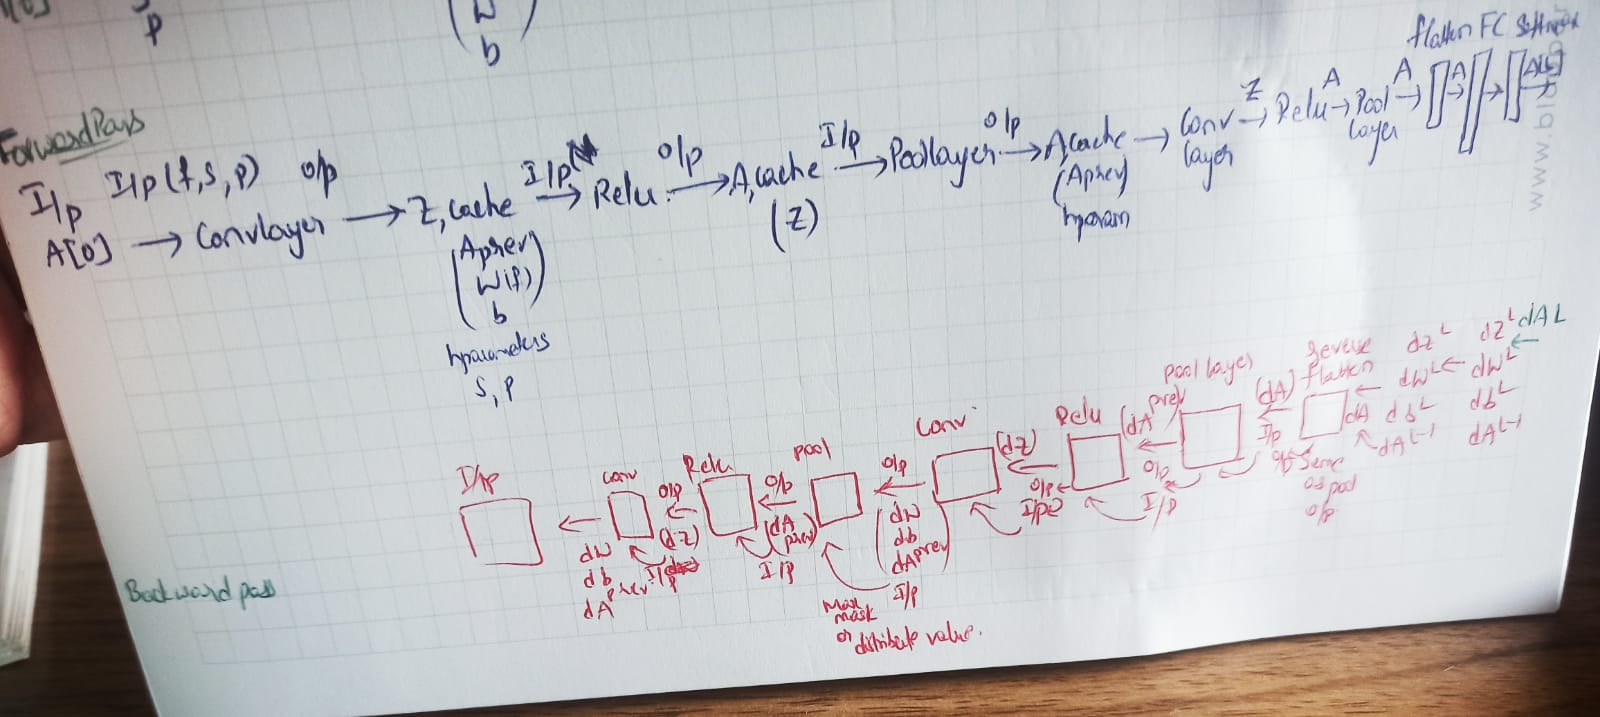

#### 5.1.1 - Computing dA:

dA corresponds to A which is conv+relu layer output(before maxpool). It gets dZ as input which is calculate from dA of relu layer

See C1_W4_L1 for backprop working

This is the formula for computing $dA$ with respect to the cost for a certain filter $W_c$ and a given training example:

$dA$ += $\Sigma_{h=0}^{n_H} \Sigma_{w=0}^{n_W} W_c$ x $dZ_{hw}$
 
 Where $W_c$ is a filter and $dZ_{hw}$ is a scalar corresponding to the gradient of the cost with respect to the output of the conv layer Z at the $h^{th}$ row and $w^{th}$ column (corresponding to the dot product taken at the $i^{th}$ stride left and $j^{th}$ stride down). 
 
Note that at each time, you multiply the the same filter $W_c$ by a different dZ when updating dA. We do so mainly because when computing the forward propagation, each filter is dotted and summed by a different a_slice. Therefore when computing the backprop for dA, you are just adding the gradients of all the a_slices.

In code, inside the appropriate for-loops, this formula translates into:

    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]


### 5.1.2 - Computing dW:
This is the formula for computing $dW_c$ with respect to the loss:

$dW_c += \Sigma_{h=0}^{n_H} \Sigma_{w=0}^{n_W} a_{slice}$ x $dZ_{hw}$ 

see this as product of input matrix and the output gradient

Where $a_{slice}$ corresponds to the input slice which was used to generate the activation $Z_{ij}$. Hence, this ends up giving us the gradient for W with respect to that slice. Since it is the same $W$, we will just add up all such gradients to get one $dW$ in a filter.

This is in the usual format $dW^{[l]} =  dZ^{[l]} X^{[l]}$. Only difference is, we are incrementing cuz, the filter is used in different slices of input.

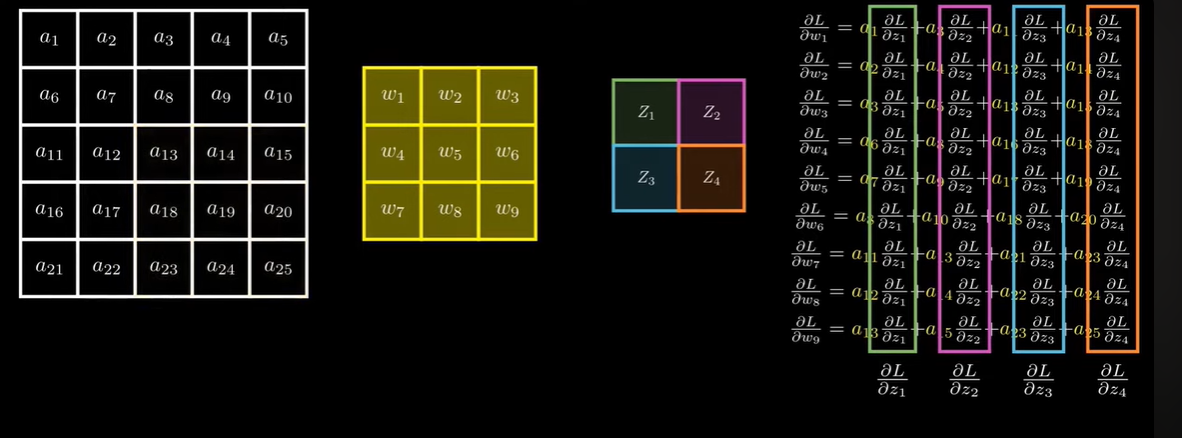

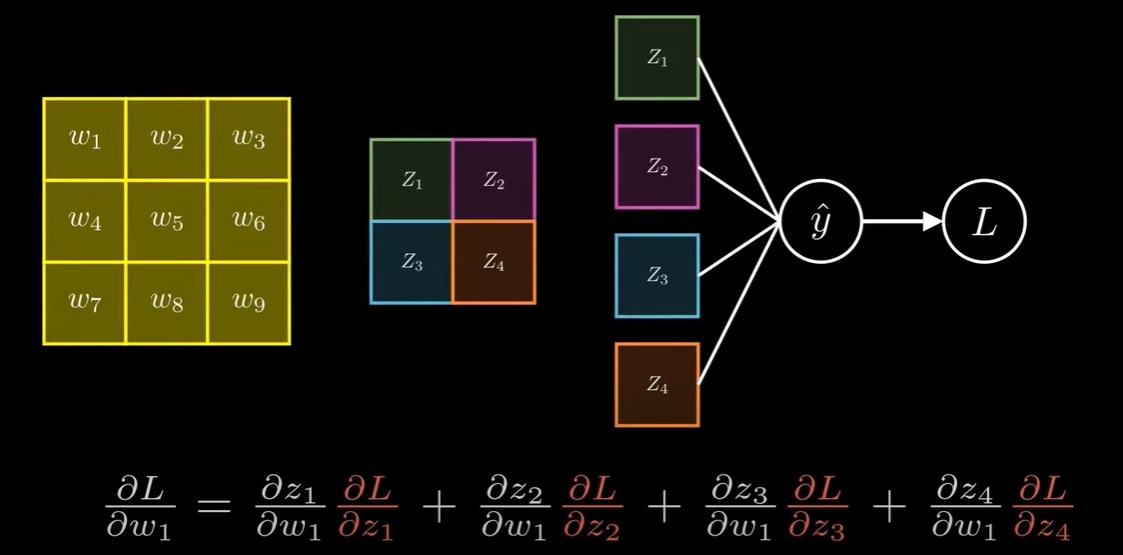

    change in w1 changes z1, z2, z3, z4. change in z1 changes loss, change in z2 changes loss, ...

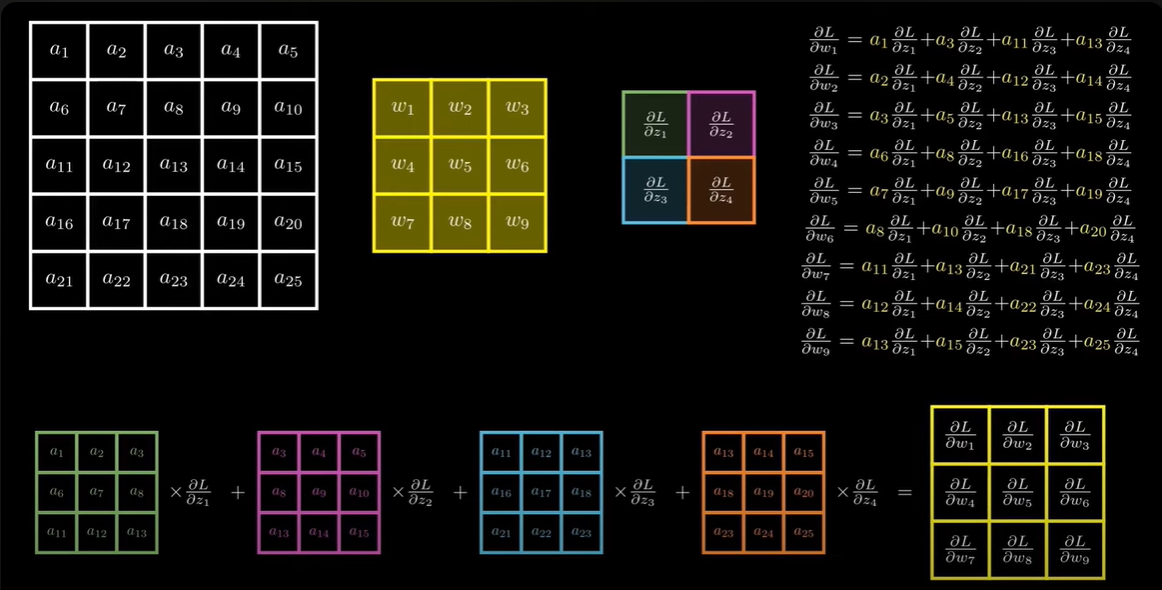

In code, inside the appropriate for-loops, this formula translates into:

        
        dW[:, :, :, c] += a_slice * dZ[i, h, w, c]

### 5.1.3 - Computing db:
This is the formula for computing $db$ with respect to the cost for a certain filter $W_c$:

$db = \Sigma_{h=0}^{n_H} \Sigma_{w=0} dZ_{hw}$
  
As you have previously seen in basic neural networks, db is computed by summing $dZ$. In this case, you are just summing over all the gradients of the conv output (Z) with respect to the cost.

In code, inside the appropriate for-loops, this formula translates into:

    db[:, :, :, c] += dZ[i, h, w, c]

### Exercise 5 - conv_backward
    Implement the conv_backward function below. You should sum over all the training examples, filters, heights, and widths. You should then compute the derivatives using formulas 1, 2 and 3 above.
 

In [60]:
def conv_backward(dZ, cache):
    """
    Implement the backward propagation for a convolution function
    
    Arguments:
    dZ -- gradient of the cost J with respect to the output of the conv layer (Z), numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward(), output of conv_forward() (A_Prev, W, b, hparameters)
    
    Returns:
    dA_prev -- gradient of the cost J with respect to the input of the conv layer (A_prev),
               numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev) - pooling output
    dW -- gradient of the cost J with respect to the weights of the conv layer (W)(filter)
          numpy array of shape (f, f, n_C_prev, n_C)
    db -- gradient of the cost J with respect to the biases of the conv layer (b)
          numpy array of shape (1, 1, 1, n_C)
    """  
    
    # Retrieve information from "cache"
    (A_prev, W, b, hparameters) = cache
    
     # Retrieve information from "hparameters"
    stride, pad = hparameters["stride"], hparameters["pad"]
    
    # Retrieve dimensions from A_prev's shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve dimensions from dZ's shape
    m, n_H, n_W, n_C = dZ.shape
    
     # Initialize dA_prev, dW, db with the correct shapes
    dW = np.zeros(W.shape)                                            #(f, f, n_C_prev, n_C)
    db = np.zeros(b.shape)                                            #(1, 1, 1, n_C)
    dA_prev = np.zeros(A_prev.shape)                                  #(m, n_H_prev, n_W_prev, n_C_prev)
    
    #apply padding to the previous layer activation cuz we are saving in cache non padded prev activation as well as pad dA_prev
    A_prev_padded = zero_pad(A_prev, pad)
    dA_prev_padded = zero_pad(dA_prev, pad)
    
    #calculating current layers dW, db and prev layers dA_prev
    # loop over the training examples
    for i in range(m):
        
        # select ith training example from A_prev_pad and dA_prev_pad
        a_prev_pad = A_prev_padded[i]
        da_prev_pad = dA_prev_padded[i]
        
        # loop over vertical axis of the output volume
        for h in range(n_H):  
            # loop over horizontal axis of the output volume
            for w in range(n_W):
                # loop over the channels of the output volume
                for c in range(n_C):
                    
                    # Find the corners of the current "slice"
                    vstart = stride * h 
                    vend = vstart + f
                    hstart = stride * w
                    hend = hstart + f
                
                    # Update gradients for the window and the filter's parameters using the code formulas given above
                    a_slice = a_prev_pad[vstart:vend, hstart:hend, :]
                    dW[:, :, :, c] += a_slice * dZ[i, h, w, c]
                    db[:, :, :, c] += dZ[i, h, w, c]
                    da_prev_pad[vstart:vend, hstart:hend, :] += W[:, :, :, c] * dZ[i, h, w, c]
                    
        # Set the ith training example's dA_prev to the unpadded da_prev_pad (Hint: use X[pad:-pad, pad:-pad, :])
        dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]
        
    # Making sure your output shape is correct
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
        
    return dA_prev, dW, db

#### Explanation of last line unpadded line
    dA_prev is a multi-dimensional array representing the gradient of the activation of the previous layer for all training examples. 
    da_prev_pad is another multi-dimensional array that contains the gradient of the activation of the previous layer after padding.

    The slicing operation [pad:-pad, pad:-pad, :] is used to remove the padding from the da_prev_pad array. It effectively selects the central region of da_prev_pad, excluding the padded edges.

    The result of this slicing operation is assigned to the i-th training example in dA_prev. The i-th training example's gradient is updated to be the same as the central, unpadded portion of da_prev_pad.

     This ensures that the gradients are correctly aligned with the unpadded input.
     
     
    The operation [pad:-pad, pad:-pad, :] is a form of slicing in NumPy and Python that extracts a subarray from a larger array. Let's break down how this operation works:

    pad represents the number of elements to exclude from the beginning (start) and end of each dimension.
    -pad represents counting from the end of the dimension. So, if pad is 2, -pad is -2, and it indicates excluding the last 2 elements of the dimension.
    Here's what happens for each dimension:

    First Dimension (pad:-pad):

        For the first dimension, pad elements are excluded from the beginning.
        -pad elements are excluded from the end.
            This effectively removes the first pad elements and the last pad elements from the dimension.
            If pad is 2, it removes the first 2 and last 2 elements.
    
    Second Dimension (pad:-pad):

        The same logic applies to the second dimension, removing pad elements from the beginning and -pad elements from the end.
    
    Third Dimension (:):

    The colon (:) indicates that all elements along this dimension are included, with no exclusions.

In [61]:
#Test the conv_backward() function
# We'll run conv_forward to initialize the 'Z' and 'cache_conv",
# which we'll use to test the conv_backward function
np.random.seed(1)
A_prev = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 2,
               "stride": 2}
Z, cache_conv = conv_forward(A_prev, W, b, hparameters)

# Test conv_backward
dA_prev, dW, db = conv_backward(Z, cache_conv)

print("dA_prev_mean =", np.mean(dA_prev))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

assert type(dA_prev) == np.ndarray, "Output must be a np.ndarray"
assert type(dW) == np.ndarray, "Output must be a np.ndarray"
assert type(db) == np.ndarray, "Output must be a np.ndarray"
assert dA_prev.shape == (10, 4, 4, 3), f"Wrong shape for dA  {dA_prev.shape} != (10, 4, 4, 3)"
assert dW.shape == (2, 2, 3, 8), f"Wrong shape for dW {dW.shape} != (2, 2, 3, 8)"
assert db.shape == (1, 1, 1, 8), f"Wrong shape for db {db.shape} != (1, 1, 1, 8)"
assert np.isclose(np.mean(dA_prev), 1.4524377), "Wrong values for dA_prev"
assert np.isclose(np.mean(dW), 1.7269914), "Wrong values for dW"
assert np.isclose(np.mean(db), 7.8392325), "Wrong values for db"

print("\033[92m All tests passed.")

dA_prev_mean = 1.4524377775388075
dW_mean = 1.7269914583139097
db_mean = 7.839232564616838
 All tests passed.


### 5.2 Pooling Layer - Backward Pass
    Next, let's implement the backward pass for the pooling layer, starting with the MAX-POOL layer. Even though a pooling layer has no parameters for backprop to update, you still need to backpropagate the gradient through the pooling layer in order to compute gradients for layers that came before the pooling layer.


#### 5.2.1 Max Pooling - Backward Pass
    Before jumping into the backpropagation of the pooling layer, you are going to build a helper function called create_mask_from_window() which does the following:
X:
\begin{bmatrix}                 
1 & 3\\
4 & 2
\end{bmatrix}

M:
\begin{bmatrix}
0 & 0\\
1 & 0
\end{bmatrix}
 
    As you can see, this function creates a "mask" matrix which keeps track of where the maximum of the matrix is. True (1) indicates the position of the maximum in X, the other entries are False (0). 

    This is cuz, in the case of Max Pooling, you will select the maximum value from each window and produce the output in the forward pass. In backpropagation, the gradient corresponding to the maximum values is sent backward and the rest is considered as 0.

    You'll see later that the backward pass for average pooling is similar to this, but uses a different mask


### Exercise 6 - create_mask_from_window
    Implement create_mask_from_window(). This function will be helpful for pooling backward. 
    
    Hints:

        np.max() may be helpful. It computes the maximum of an array.
        If you have a matrix X and a scalar x: A = (X == x) will return a matrix A of the same size as X such that:
            A[i,j] = True if X[i,j] = x
            A[i,j] = False if X[i,j] != x
       Here, you don't need to consider cases where there are several maxima in a matrix.

In [62]:
def create_mask_from_window(x):
    """
    Creates a mask from an input matrix x, to identify the max entry of x.
    
    Arguments:
    x -- Array of shape (f, f)
    
    Returns:
    mask -- Array of the same shape as window, contains a True at the position corresponding to the max entry of x.
    """ 
    max_val = np.max(x)
    mask = (x == max_val)
    return mask

In [63]:
#Test the create_mask_from_window() function
np.random.seed(1)
x = np.random.randn(2, 3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

x = np.array([[-1, 2, 3],
              [2, -3, 2],
              [1, 5, -2]])

y = np.array([[False, False, False],
     [False, False, False],
     [False, True, False]])
mask = create_mask_from_window(x)

assert type(mask) == np.ndarray, "Output must be a np.ndarray"
assert mask.shape == x.shape, "Input and output shapes must match"
assert np.allclose(mask, y), "Wrong output. The True value must be at position (2, 1)"

print("\033[92m All tests passed.")

x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]
 All tests passed.


    Why keep track of the position of the max? It's because this is the input value(from Z) that ultimately influenced the output(A), and therefore the cost. Backprop is computing gradients with respect to the cost, so anything that influences the ultimate cost should have a non-zero gradient. So, backprop will "propagate" the gradient back to this particular input value that had influenced the cost.

### 5.2.2 - Average Pooling - Backward Pass
    In max pooling, for each input window, all the "influence" on the output came from a single input value--the max. 
    
    In average pooling, every element of the input window has equal influence on the output. So to implement backprop, you will now implement a helper function that reflects this.

    For example if we did average pooling in the forward pass using a 2x2 filter, then the mask you'll use for the backward pass will look like:

dZ = 1 

=> dZ = 

\begin{bmatrix}
1/4 & 1/4\\
1/4 & 1/4
\end{bmatrix}
 

This implies that each position in the $dZ$ matrix contributes equally to output because in the forward pass, we took an average.

### Exercise 7 - distribute_value
    Implement the function below to equally distribute a value dz through a matrix of dimension shape.

In [69]:
def distribute_value(dz, shape):
    """
    Distributes the input value in the matrix of dimension shape
    
    Arguments:
    dz -- input scalar
    shape -- the shape (n_H, n_W) of the output matrix for which we want to distribute the value of dz
    
    Returns:
    a -- Array of size (n_H, n_W) for which we distributed the value of dz
    """ 
    # Retrieve dimensions from shape
    (n_H, n_W) = shape
    
    # Compute the value to distribute on the matrix
    average = np.prod(shape) #Return the product of array elements over a given axis n_H*n_W
    a = (dz/average) * np.ones(shape)
    
    return a
    

In [66]:
#test the function distribute_value()
a = distribute_value(2, (2, 2))
print('distributed value =', a)


assert type(a) == np.ndarray, "Output must be a np.ndarray"
assert a.shape == (2, 2), f"Wrong shape {a.shape} != (2, 2)"
assert np.sum(a) == 2, "Values must sum to 2"

a = distribute_value(100, (10, 10))
assert type(a) == np.ndarray, "Output must be a np.ndarray"
assert a.shape == (10, 10), f"Wrong shape {a.shape} != (10, 10)"
assert np.sum(a) == 100, "Values must sum to 100"

print("\033[92m All tests passed.")

distributed value = [[0.5 0.5]
 [0.5 0.5]]
 All tests passed.


### 5.2.3 Putting it Together: Pooling Backward
    You now have everything you need to compute backward propagation on a pooling layer.

### Exercise 8 - pool_backward
    Implement the pool_backward function in both modes ("max" and "average"). You will once again use 4 for-loops (iterating over training examples, height, width, and channels). 
    
    You should use an if/elif statement to see if the mode is equal to 'max' or 'average'. If it is equal to 'average' you should use the distribute_value() function you implemented above to create a matrix of the same shape as a_slice. Otherwise, the mode is equal to 'max', and you will create a mask with create_mask_from_window() and multiply it by the corresponding value of dA.

In [1]:
def pool_backward(dA, cache, mode = "max"):
    """
    Implements the backward pass of the pooling layer
    
    Arguments:
    dA -- gradient of cost J with respect to the output A of the pooling layer, same shape as A, calulculates from previous dZ of dense layer(in backpass)
    cache -- cache output from the forward pass of the pooling layer, contains the layer's input and hparameters 
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    dA_prev -- gradient of cost J with respect to the input(output of conv+relu) of the pooling layer, same shape as A_prev (A_prev = conv layer output after activation)
    """
    # Retrieve information from cache (≈1 line)
    (A_prev, hparameters) = cache
    
    # Retrieve hyperparameters from "hparameters" (≈2 lines)
    stride = hparameters["stride"]
    f = hparameters["f"]
    
    # Retrieve dimensions from A_prev's shape and dA's shape (≈2 lines)
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape
    
    # Initialize dA_prev with zeros (≈1 line) #this corresponds to relu output activation
    dA_prev = np.zeros(A_prev.shape)
    
    for i in range(m): # loop over the training examples
        
        # select training example from A_prev (≈1 line)
        a_prev = A_prev[i, :, :, :]
        
        for h in range(n_H):                   # loop on the vertical axis
            for w in range(n_W):               # loop on the horizontal axis
                for c in range(n_C):           # loop over the channels (depth)
        
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start  = h * stride
                    vert_end    = h * stride + f
                    horiz_start = w * stride
                    horiz_end   = w * stride + f
                    
                    # Compute the backward propagation in both modes.
                    if mode == "max":
                        
                        # Use the corners and "c" to define the current slice from a_prev (≈1 line)
                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]
                        
                        # Create the mask from a_prev_slice (≈1 line)
                        mask = create_mask_from_window(a_prev_slice)

                        # Set dA_prev to be dA_prev + (the mask multiplied by the correct entry of dA) (≈1 line)
                        #considering only the dA that contributed to the max pool A and ultimately to the loass function
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += mask * dA[i, h, w, c]
                        
                    elif mode == "average":
                        
                        # Get the value da from dA (≈2 line)
                        da = dA[i, h, w, c]
                        
                        # Define the shape of the filter as fxf (≈1 line)
                        shape = (f, f)

                        # Distribute it to get the correct slice of dA_prev. i.e. Add the distributed value of da. (≈1 line)
                        dA_prev[i, vert_start: vert_end, horiz_start: horiz_end, c] += distribute_value(da, shape)
    
    # Making sure your output shape is correct
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev

In [70]:
#Test the function pool_backward()
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
print(A.shape)
print(cache[0].shape)
dA = np.random.randn(5, 4, 2, 2)

dA_prev1 = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev1[1,1] = ', dA_prev1[1, 1])  
print()
dA_prev2 = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev2[1,1] = ', dA_prev2[1, 1]) 

assert type(dA_prev1) == np.ndarray, "Wrong type"
assert dA_prev1.shape == (5, 5, 3, 2), f"Wrong shape {dA_prev1.shape} != (5, 5, 3, 2)"
assert np.allclose(dA_prev1[1, 1], [[0, 0], 
                                    [ 5.05844394, -1.68282702],
                                    [ 0, 0]]), "Wrong values for mode max"
assert np.allclose(dA_prev2[1, 1], [[0.08485462,  0.2787552], 
                                    [1.26461098, -0.25749373], 
                                    [1.17975636, -0.53624893]]), "Wrong values for mode average"
print("\033[92m All tests passed.")

(5, 4, 2, 2)
(5, 5, 3, 2)
mode = max
mean of dA =  0.14571390272918056
dA_prev1[1,1] =  [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]

mode = average
mean of dA =  0.14571390272918056
dA_prev2[1,1] =  [[ 0.08485462  0.2787552 ]
 [ 1.26461098 -0.25749373]
 [ 1.17975636 -0.53624893]]
 All tests passed.


    Congratulations! You've completed the assignment and its optional portion. You now understand how convolutional neural networks work, and have implemented all the building blocks of a neural network. In the next assignment you will implement a ConvNet using TensorFlow. Nicely done! See you there.

### Test cases

In [71]:
def zero_pad_test(target):    
    # Test 1
    np.random.seed(1)
    x = np.random.randn(4, 3, 3, 2)
    x_pad = target(x, 3)
    print ("x.shape =\n", x.shape)
    print ("x_pad.shape =\n", x_pad.shape)
    print ("x[1,1] =\n", x[1, 1])
    print ("x_pad[1,1] =\n", x_pad[1, 1])

    assert type(x_pad) == np.ndarray, "Output must be a np array"
    assert x_pad.shape == (4, 9, 9, 2), f"Wrong shape: {x_pad.shape} != (4, 9, 9, 2)"
    print(x_pad[0, 0:2,:, 0])
    assert np.allclose(x_pad[0, 0:2,:, 0], [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]], 1e-15), "Rows are not padded with zeros"
    assert np.allclose(x_pad[0, :, 7:9, 1].transpose(), [[0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0]], 1e-15), "Columns are not padded with zeros"
    assert np.allclose(x_pad[:, 3:6, 3:6, :], x, 1e-15), "Internal values are different"

    # Test 2
    np.random.seed(1)
    x = np.random.randn(5, 4, 4, 3)
    pad = 2
    x_pad = target(x, pad)
    
    assert type(x_pad) == np.ndarray, "Output must be a np array"
    assert x_pad.shape == (5, 4 + 2 * pad, 4 + 2 * pad, 3), f"Wrong shape: {x_pad.shape} != {(5, 4 + 2 * pad, 4 + 2 * pad, 3)}"
    assert np.allclose(x_pad[0, 0:2,:, 0], [[0, 0, 0, 0, 0, 0, 0, 0], 
                                            [0, 0, 0, 0, 0, 0, 0, 0]], 1e-15), "Rows are not padded with zeros"
    assert np.allclose(x_pad[0, :, 6:8, 1].transpose(), [[0, 0, 0, 0, 0, 0, 0, 0],
                                                         [0, 0, 0, 0, 0, 0, 0, 0]], 1e-15), "Columns are not padded with zeros"
    assert np.allclose(x_pad[:, 2:6, 2:6, :], x, 1e-15), "Internal values are different"
    
    print("\033[92mAll tests passed!")
    
zero_pad_test(zero_pad)

x.shape =
 (4, 3, 3, 2)
x_pad.shape =
 (4, 9, 9, 2)
x[1,1] =
 [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] =
 [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]
All tests passed!


In [72]:
def conv_single_step_test(target):

    np.random.seed(3)
    a_slice_prev = np.random.randn(5, 5, 3)
    W = np.random.randn(5, 5, 3)
    b = np.random.randn(1, 1, 1)
    
    Z = target(a_slice_prev, W, b)
    expected_output = np.float64(-3.5443670581382474)
    
    assert (type(Z) == np.float64 or type(Z) == np.float32), "You must cast the output to float"
    assert np.isclose(Z, expected_output), f"Wrong value. Expected: {expected_output} got: {Z}"
    
    print("\033[92mAll tests passed!")
    
conv_single_step_test(conv_single_step)

All tests passed!


In [75]:
def conv_forward_test_1(z_mean, z_0_2_1, cache_0_1_2_3):
    test_count = 0
    z_mean_expected = 0.5511276474566768
    z_0_2_1_expected = [-2.17796037,  8.07171329, -0.5772704,   3.36286738,  4.48113645, -2.89198428, 10.99288867,  3.03171932]
    cache_0_1_2_3_expected = [-1.1191154,   1.9560789,  -0.3264995,  -1.34267579]
    
    if np.isclose(z_mean, z_mean_expected):
        test_count = test_count + 1
    else:
        print("\033[91mFirst Test: Z's mean is incorrect. Expected:", z_mean_expected, "\nYour output:", z_mean, "\033[90m\n")
        
    if np.allclose(z_0_2_1, z_0_2_1_expected):
        test_count = test_count + 1
    else:
        print("\033[91mFirst Test: Z[0,2,1] is incorrect. Expected:", z_0_2_1_expected, "\nYour output:", z_0_2_1, "\033[90m\n")
        
    if np.allclose(cache_0_1_2_3, cache_0_1_2_3_expected):
        test_count = test_count + 1
    else:
        print("\033[91mFirst Test: cache_conv[0][1][2][3] is incorrect. Expected:", cache_0_1_2_3_expected, "\nYour output:",
              cache_0_1_2_3, "\033[90m")
    
    if test_count == 3:
        print("\033[92mFirst Test: All tests passed!")

np.random.seed(1)
A_prev = np.random.randn(2, 5, 7, 4) #m, nH_prev, nW_prev, nC_prev
W = np.random.randn(3, 3, 4, 8) #f, f, nCprev, nC
b = np.random.randn(1, 1, 1, 8) #1, 1, 1, nC
hparams = {"stride" : 2, "pad" : 1}
Z, cache_conv = conv_forward(A_prev, W, b, hparams) # m, nH, nW, nC
Z_mean = np.mean(Z)
Z_0_2_1 = Z[0, 2, 1]
cache_0_1_2_3 = cache_conv[0][1][2][3]
conv_forward_test_1(z_mean, Z_0_2_1, cache_0_1_2_3)

First Test: All tests passed!


In [76]:
def conv_forward_test_2(target):
    # Test 1
    np.random.seed(3)
    A_prev = np.random.randn(2, 5, 7, 4)
    W = np.random.randn(3, 3, 4, 8)
    b = np.random.randn(1, 1, 1, 8)
    
    Z, cache_conv = target(A_prev, W, b, {"pad" : 3, "stride": 1})
    Z_shape = Z.shape
    assert Z_shape[0] == A_prev.shape[0], f"m is wrong. Current: {Z_shape[0]}.  Expected: {A_prev.shape[0]}"
    assert Z_shape[1] == 9, f"n_H is wrong. Current: {Z_shape[1]}.  Expected: 9"
    assert Z_shape[2] == 11, f"n_W is wrong. Current: {Z_shape[2]}.  Expected: 11"
    assert Z_shape[3] == W.shape[3], f"n_C is wrong. Current: {Z_shape[3]}.  Expected: {W.shape[3]}"

    # Test 2 
    Z, cache_conv = target(A_prev, W, b, {"pad" : 0, "stride": 2})
    assert(Z.shape == (2, 2, 3, 8)), "Wrong shape. Don't hard code the pad and stride values in the function"
    
    # Test 3
    W = np.random.randn(5, 5, 4, 8)
    b = np.random.randn(1, 1, 1, 8)
    Z, cache_conv = target(A_prev, W, b, {"pad" : 6, "stride": 1})
    Z_shape = Z.shape
    assert Z_shape[0] == A_prev.shape[0], f"m is wrong. Current: {Z_shape[0]}.  Expected: {A_prev.shape[0]}"
    assert Z_shape[1] == 13, f"n_H is wrong. Current: {Z_shape[1]}.  Expected: 13"
    assert Z_shape[2] == 15, f"n_W is wrong. Current: {Z_shape[2]}.  Expected: 15"
    assert Z_shape[3] == W.shape[3], f"n_C is wrong. Current: {Z_shape[3]}.  Expected: {W.shape[3]}"

    Z_means = np.mean(Z)
    expected_Z = -0.5384027772160062
    
    expected_conv = np.array([[ 1.98848968,  1.19505834, -0.0952376,  -0.52718778],
                             [-0.32158469,  0.15113037, -0.01862772,  0.48352879],
                             [ 0.76896516,  1.36624284,  1.14726479, -0.11022916],
                             [ 0.38825041, -0.38712718, -0.58722031,  1.91082685],
                             [-0.45984615,  1.99073781, -0.34903539,  0.25282509],
                             [ 1.08940955,  0.02392202,  0.39312528, -0.2413848 ],
                             [-0.47552486, -0.16577702, -0.64971742,  1.63138295]])
    
    assert np.isclose(Z_means, expected_Z), f"Wrong Z mean. Expected: {expected_Z} got: {Z_means}"
    assert np.allclose(cache_conv[0][1, 2], expected_conv), f"Values in Z are wrong"

    print("\033[92mSecond Test: All tests passed!")
    
conv_forward_test_2(conv_forward)

Second Test: All tests passed!


In [77]:
def pool_forward_test(target):
    
    # Test 1
    A_prev = np.random.randn(2, 5, 7, 3)
    A, cache = target(A_prev, {"stride" : 2, "f": 2}, mode = "average")
    A_shape = A.shape
    assert A_shape[0] == A_prev.shape[0], f"Test 1 - m is wrong. Current: {A_shape[0]}.  Expected: {A_prev.shape[0]}"
    assert A_shape[1] == 2, f"Test 1 - n_H is wrong. Current: {A_shape[1]}.  Expected: 2"
    assert A_shape[2] == 3, f"Test 1 - n_W is wrong. Current: {A_shape[2]}.  Expected: 3"
    assert A_shape[3] == A_prev.shape[3], f"Test 1 - n_C is wrong. Current: {A_shape[3]}.  Expected: {A_prev.shape[3]}"
    
    # Test 2
    A_prev = np.random.randn(4, 5, 7, 4)
    A, cache = target(A_prev, {"stride" : 1, "f": 5}, mode = "max")
    A_shape = A.shape
    assert A_shape[0] == A_prev.shape[0], f"Test 2 - m is wrong. Current: {A_shape[0]}.  Expected: {A_prev.shape[0]}"
    assert A_shape[1] == 1, f"Test 2 - n_H is wrong. Current: {A_shape[1]}.  Expected: 1"
    assert A_shape[2] == 3, f"Test 2 - n_W is wrong. Current: {A_shape[2]}.  Expected: 3"
    assert A_shape[3] == A_prev.shape[3], f"Test 2 - n_C is wrong. Current: {A_shape[3]}.  Expected: {A_prev.shape[3]}"
    
    # Test 3
    np.random.seed(1)
    A_prev = np.random.randn(2, 5, 5, 3)
    
    A, cache = target(A_prev, {"stride" : 1, "f": 2}, mode = "max")
    
    assert np.allclose(A[1, 1], np.array([[1.19891788, 0.74055645, 0.07734007],
                                         [0.31515939, 0.84616065, 0.07734007],
                                         [0.69803203, 0.84616065, 1.2245077 ],
                                         [0.69803203, 1.12141771, 1.2245077 ]])), "Wrong value for A[1, 1]"
                                          
    assert np.allclose(cache[0][1, 2], np.array([[ 0.16938243,  0.74055645, -0.9537006 ],
                                         [-0.26621851,  0.03261455, -1.37311732],
                                         [ 0.31515939,  0.84616065, -0.85951594],
                                         [ 0.35054598, -1.31228341, -0.03869551],
                                         [-1.61577235,  1.12141771,  0.40890054]])), "Wrong value for cache"
    
    A, cache = target(A_prev, {"stride" : 1, "f": 2}, mode = "average")
    
    assert np.allclose(A[1, 1], np.array([[ 0.11583785,  0.34545544, -0.6561907 ],
                                         [-0.2334108,   0.3364666,  -0.69382351],
                                         [ 0.25497093, -0.21741362, -0.07342615],
                                         [-0.04092568, -0.01110394,  0.12495022]])), "Wrong value for A[1, 1]"

    print("\033[92mAll tests passed!")
    
pool_forward_test(pool_forward)

All tests passed!


In [8]:
#Self Practice
import numpy as np

def zero_pad(x, pad):
    X_padded = np.pad(x, ((0, 0), (pad, pad), (pad, pad), (0, 0)), mode="constant", constant_values=(0, 0))
    return X_padded

def conv_single_step(a, W, b):
    s = np.multiply(a, W) #(f, f, nC) (f, f, nC) #multiply rule
    Z = np.sum(Z)
    b = np.squeeze(b)
    Z = s + b
    return Z

def conv_forward(A_prev, W, b, hparameters):
    pad, stride = hparameters["pad"], hparameters["stride"]
    f, f, n_C_prev, n_C = W.shape
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    
    n_H = int((n_H_prev + 2*pad - f) / stride ) + 1
    n_W = int((n_W_prev + 2*pad - f) / stride ) + 1
    Z = np.zeros((m, n_H, n_W, n_C)) 
    
    A_prev_padded = zero_pad(A_prev, pad)
    
    #convolve operation to get Z - 3D Matrices (n_H, n_W, n_C) for each m
    for i in range(m):
        a_prev = A_prev_padded[i]
        
        for h in range(n_H):
            vert_start = stride * h
            vert_end = vert_start + f
            
            for w in range(n_W):
                hori_start = stride * w
                hori_end = hori_start + f
                
                for c in range(n_C):
                    a_prev_silce = a_prev[vert_start:vert_start, hori_start:hori_start, :]
                    W = W[:, :, :, c]
                    b = b[:, :, :, c]
                    Z[i, h, w, c] = conv_single_step(a_prev_slice, W, b)
    
    #Z shape = m, n_H, n_W, n_C 
    cache_conv = (A_prev, W, b, hparameters)
    return Z, cache_conv

def pool_forward(A_prev, hparameters, pool="max"):
    f, stride = hparameters["f"], hparameters["stride"]
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    n_H = int((n_H_prev - f) / stride) + 1
    n_W = int((n_W_prev - f) / stride) + 1
    n_C = n_C_prev
    
    A = np.zeros((m, n_H, n_W, n_C))
    for i in range(m):
        a_prev = A_prev[i]
        for h in range(n_H):
            vert_start = stride * h
            vert_end = vert_start + f
            for w in range(n_W):
                hori_start = stride * w
                hori_end = hori_start + f
                for c in range(n_C):
                    a_prev_silce = a_prev[vert_start:vert_start, hori_start:hori_start, c]
                    if pool == "max":
                        A[i, h, w, c] = np.max(a_prev_silce)
                    elif pool == "avg":
                        A[i, h, w, c] = np.mean(a_prev_silce)
                    else:
                        print("Pooling operation not detected")   
    
    cache_pool = (A_prev, hparameters)
    return A, cache_pool

def maxpool_mask(x):
    max_val = np.max(x)
    x_mask = (x==max_val)
    return x_mask

def distribute_value(dA, shape):
    n_H, n_W = shape
    average = np.prod(shape)
    dA_distribute = (dA/average) * np.ones(shape)
    return dA_distribute

def pool_backward(dA, cache, mode="max"):
    A_prev, hparameters = cache
    f, stride = hparameters["f"], hparameters["stride"]
    m, n_H, n_W, n_C = dA.shape
    
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    dA_prev = np.zeros(A_prev.shape)
    
    for i in range(m):
        a_prev = A_prev[i]
        for h in range(n_H):
            vert_start = stride * h
            vert_end = vert_start + f
            for w in range(n_W):
                hori_start = stride * w
                hori_end = hori_start + f
                for c in range(n_C):
                    if mode == "max":
                        a_prev_slice = a_prev[vert_start:vert_start, hori_start:hori_start, c]
                        mask = maxpool_mask(a_prev_slice)
                        dA_prev[i, vert_start:vert_start, hori_start:hori_start, c] += mask * dA[i, h, w, c]
                    elif mode == "avg":
                        shape = (f, f)
                        dA_prev[i, vert_start:vert_start, hori_start:hori_start, c] += distribute_value(dA[i, h, w, c], shape)
    
    assert(dA_prev.shape == A_prev.shape)
    return dA_prev

def relu_backward(dA, cache): #from pool layer o/p in backward direction
    #cache contains(Z[l])
    #return dZ[l] = dA[l] * g'(Z[l])
    pass

def conv_backward(dZ, cache):
    A_prev, W, b, hparameters = cache
    stride, pad = hparameters["stride"], hparameters["pad"]
    
    dW = np.zeros(W.shape)
    db = np.zeros(b.shape)
    dA_prev = np.zeros(A_prev.shape)
    
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    f, f, n_C_prev, n_C = W.shape
    
    m, n_H, n_W, n_C = dZ.shape
    
    A_prev_pad = zero_pad(A_prev, pad)
    dA_prev_pad = zero_pad(dA_prev, pad)
    
    for i in range(m):
        a_prev_pad = A_prev_pad[i]
        da_prev_pad = dA_prev_pad[i]
        
        for h in range(n_H):
            vert_start = stride * h
            vert_end = vert_start + f
            for w in range(n_W):
                hori_start = stride * w
                hori_end = hori_start + f
                for c in range(n_C):
                    a_prev_slice = a_prev_pad[vert_start:vert_end, hori_start:hori_end, :]
                    dW[:, :, :, c] += dZ[i, h, w, c] * a_prev_slice
                    db[:, :, :, c] += dZ[i, h, w, c]
                    dA_prev_pad[vert_start:vert_end, hori_start:hori_end, c] += W[:, :, :, c] * dZ[i, h, w, c] 
    
        #unpad dA_prev_pad
        dA_prev[i, :, :, :] = dA_prev_pad[pad:-pad, pad:-pad, :]
    
    return dW, db, dA_prev